In [1]:
modalities = ["Face", "Iris", "Fingerprint", "Face + Iris", "Face + Fingerprint", "Iris + Fingerprint", "All"]

data = [
    {"Modality Set": "All", "Preprocessing": "/", "Classifier": "Dummy Classifier", "Accuracy": 0.002, "F1 Score": 0.00},
    {"Modality Set": "Face", "Preprocessing": "/", "Classifier": "Random Forest", "Accuracy": 0.23, "F1 Score": 0.21},
    {"Modality Set": "Iris", "Preprocessing": "/", "Classifier": "Random Forest", "Accuracy": 0.74, "F1 Score": 0.70},
    {"Modality Set": "Fingerprint", "Preprocessing": "/", "Classifier": "Random Forest", "Accuracy": 0.69, "F1 Score": 0.67},
    {"Modality Set": "Face", "Preprocessing": "PCA", "Classifier": "Random Forest", "Accuracy": 0.36, "F1 Score": 0.31},
    {"Modality Set": "Iris", "Preprocessing": "PCA", "Classifier": "Random Forest", "Accuracy": 0.89, "F1 Score": 0.87},
    {"Modality Set": "Fingerprint", "Preprocessing": "PCA", "Classifier": "Random Forest", "Accuracy": 0.84, "F1 Score": 0.83},
    {"Modality Set": "Face + Iris", "Preprocessing": "PCA", "Classifier": "Random Forest", "Accuracy": 0.95, "F1 Score": 0.94},
    {"Modality Set": "Face + Fingerprint", "Preprocessing": "PCA", "Classifier": "Random Forest", "Accuracy": 0.93, "F1 Score": 0.91},
    {"Modality Set": "Iris + Fingerprint", "Preprocessing": "PCA", "Classifier": "Random Forest", "Accuracy": 0.95, "F1 Score": 0.94},
    {"Modality Set": "All", "Preprocessing": "PCA", "Classifier": "Random Forest", "Accuracy": 0.98, "F1 Score": 0.97},
    {"Modality Set": "Face", "Preprocessing": "PCA", "Classifier": "kNN", "Accuracy": 0.53, "F1 Score": 0.48},
    {"Modality Set": "Iris", "Preprocessing": "PCA", "Classifier": "kNN", "Accuracy": 0.93, "F1 Score": 0.92},
    {"Modality Set": "Fingerprint", "Preprocessing": "PCA", "Classifier": "kNN", "Accuracy": 0.93, "F1 Score": 0.92},
    {"Modality Set": "Face + Iris", "Preprocessing": "PCA", "Classifier": "kNN", "Accuracy": 0.99, "F1 Score": 0.99},
    {"Modality Set": "Face + Fingerprint", "Preprocessing": "PCA", "Classifier": "kNN", "Accuracy": 0.97, "F1 Score": 0.97},
    {"Modality Set": "Iris + Fingerprint", "Preprocessing": "PCA", "Classifier": "kNN", "Accuracy": 0.99, "F1 Score": 0.99},
    {"Modality Set": "All", "Preprocessing": "PCA", "Classifier": "kNN", "Accuracy": 1.00, "F1 Score": 1.00}
]


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

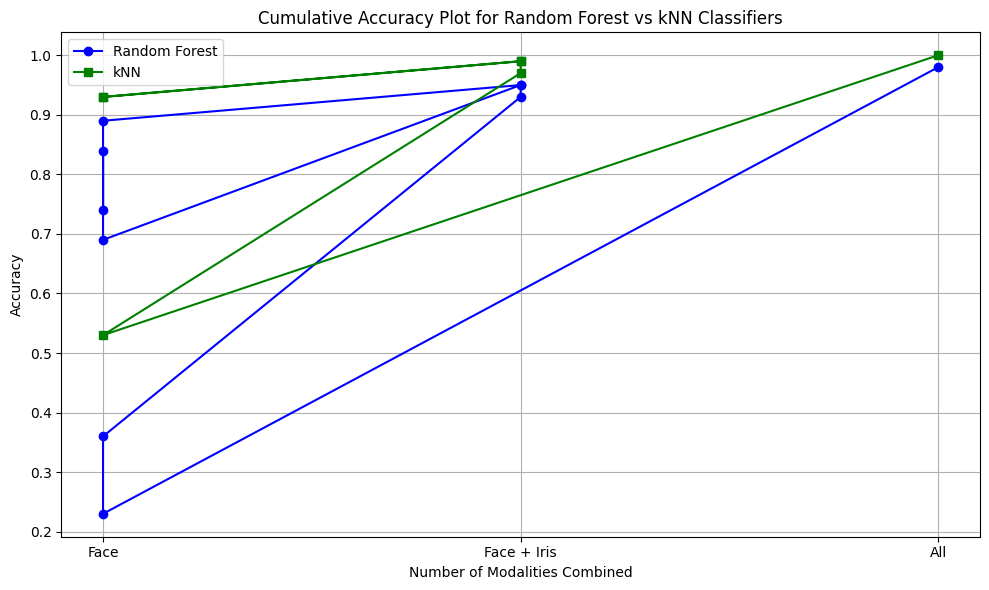

In [4]:
df = pd.DataFrame(data)

# Filter data for Random Forest and kNN classifiers
rf_data = df[df["Classifier"] == "Random Forest"].sort_values(by="Modality Set")
knn_data = df[df["Classifier"] == "kNN"].sort_values(by="Modality Set")

# Define a function to extract modality set sizes (Face, Iris, Fingerprint) for cumulative plotting
def extract_modality_number(modality_set):
    if "All" in modality_set:
        return 3
    if "+" in modality_set:
        return 2
    
    return 1

# Extract number of modalities for x-axis
rf_data["Num Modalities"] = rf_data["Modality Set"].apply(extract_modality_number)
knn_data["Num Modalities"] = knn_data["Modality Set"].apply(extract_modality_number)

# Plotting the Cumulative Accuracy plot
plt.figure(figsize=(10, 6))

# Plot for Random Forest
plt.plot(rf_data["Num Modalities"], rf_data["Accuracy"], label="Random Forest", marker='o', color='blue')

# Plot for kNN
plt.plot(knn_data["Num Modalities"], knn_data["Accuracy"], label="kNN", marker='s', color='green')

# Customize plot
plt.title("Cumulative Accuracy Plot for Random Forest vs kNN Classifiers")
plt.xlabel("Number of Modalities Combined")
plt.ylabel("Accuracy")
plt.xticks([1, 2, 3], ["Face", "Face + Iris", "All"])
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

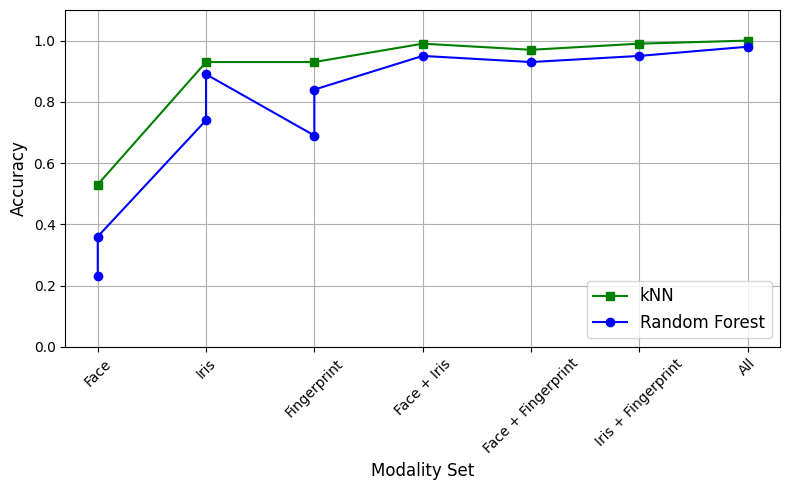

In [18]:
df = pd.DataFrame(data)

# Filter data for Random Forest and kNN classifiers
rf_data = df[df["Classifier"] == "Random Forest"].sort_values(by="Modality Set")
knn_data = df[df["Classifier"] == "kNN"].sort_values(by="Modality Set")

# Define the correct order for the modality combinations
modality_order = ["Face", "Iris", "Fingerprint", "Face + Iris", "Face + Fingerprint", "Iris + Fingerprint", "All"]

# Reorder the data according to the specified modality order
rf_data["Modality Set"] = pd.Categorical(rf_data["Modality Set"], categories=modality_order, ordered=True)
knn_data["Modality Set"] = pd.Categorical(knn_data["Modality Set"], categories=modality_order, ordered=True)

# Sort the data according to the Modality Set
rf_data = rf_data.sort_values("Modality Set")
knn_data = knn_data.sort_values("Modality Set")

# Plotting the Cumulative Accuracy plot
plt.figure(figsize=(8, 5))

# Plot for Random Forest

# Plot for kNN
plt.plot(knn_data["Modality Set"], knn_data["Accuracy"], label="kNN", marker='s', color='green')
plt.plot(rf_data["Modality Set"], rf_data["Accuracy"], label="Random Forest", marker='o', color='blue')
plt.ylim(0, 1.1)
# Customize plot
plt.xlabel("Modality Set", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels for better readability
plt.legend(fontsize=12, loc="lower right")

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()